# Setup and Context

<img src="https://i.imgur.com/gugIA5r.png" width=700>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Introduction

Dr Ignaz Semmelweis was a Hungarian physician born in 1818 who worked in the Vienna General Hospital. In the past people thought of illness as caused by "bad air" or evil spirits. But in the 1800s Doctors started looking more at anatomy, doing autopsies and started making arguments based on data. Dr Semmelweis suspected that something was going wrong with the procedures at Vienna General Hospital. Semmelweis wanted to figure out why so many women in maternity wards were dying from childbed fever (i.e., [puerperal fever](https://en.wikipedia.org/wiki/Postpartum_infections)).

<img src=https://i.imgur.com/lSyNUwR.png width=700>

Today you will become Dr Semmelweis. This is your office 👆. You will step into Dr Semmelweis' shoes and analyse the same data collected from 1841 to 1849.

### The Data Source

Dr Semmelweis published his research in 1861. I found the scanned pages of the [full text with the original tables in German](http://www.deutschestextarchiv.de/book/show/semmelweis_kindbettfieber_1861), but an excellent [English translation can be found here](http://graphics8.nytimes.com/images/blogs/freakonomics/pdf/the%20etiology,%20concept%20and%20prophylaxis%20of%20childbed%20fever.pdf).

<img src=https://i.imgur.com/6HfLtaC.png width=500>

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server.

In [4]:
# %pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 48.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


### Import Statements

In [85]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Notebook Presentation

In [7]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read the Data

In [8]:
df_yearly = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/annual_deaths_by_clinic.csv')
# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/monthly_deaths.csv',
                      parse_dates=['date'])

# Preliminary Data Exploration

**Challenge**: Check out these two DataFrames ☝️.
* What is the shape of df_yearly and df_monthly? How many rows and columns?
* What are the column names?
* Which years are included in the dataset?
* Are there any NaN values or duplicates?
* What were the average number of births that took place per month?
* What were the average number of deaths that took place per month?

In [9]:
# Get shape of df_yearly and df_monthly.
print(f"Shape of df_yearly: {df_yearly.shape}.")
print(f"Shape of df_monthly: {df_monthly.shape}.\n")

# Get number of row and columns of df_yearly and df_monthly.
print(f"df_yearly has {df_yearly.shape[0]} rows and {df_yearly.shape[1]} columns.")
print(f"df_monthly has {df_monthly.shape[0]} rows and {df_monthly.shape[1]} columns.\n")

# Get column name of df_yearly and df_monthly.
print(f"df_yearly column names: {df_yearly.columns}.")
print(f"df_monthly column names: {df_monthly.columns}.\n")

Shape of df_yearly: (12, 4).
Shape of df_monthly: (98, 3).

df_yearly has 12 rows and 4 columns.
df_monthly has 98 rows and 3 columns.

df_yearly column names: Index(['year', 'births', 'deaths', 'clinic'], dtype='object').
df_monthly column names: Index(['date', 'births', 'deaths'], dtype='object').



In [10]:
# Get years included in the df_yearly dataset.
print(f"Years included in the df_yearly dataset: {df_yearly.year.unique()}.")

# Get years included in the df_monthly dataset.
print(f"Years included in the df_monthly dataset: {df_monthly.date.dt.year.unique()}.\n")

Years included in the df_yearly dataset: [1841 1842 1843 1844 1845 1846].
Years included in the df_monthly dataset: [1841 1842 1843 1844 1845 1846 1847 1848 1849].



### Check for Nan Values and Duplicates

In [11]:
# Check for any NaN values in df_yearly and df_monthly.
print(f"Any NaN values in df_yearly dataset: {df_yearly.isna().values.any()}.")
print(f"Any NaN values in df_monthly dataset: {df_monthly.isna().values.any()}.\n")

# Check for any duplicated values in df_yearly and df_monthly.
print(f"Any duplicated values in df_yearly dataset: {df_yearly.duplicated().values.any()}.")
print(f"Any duplicated values in df_monthly dataset: {df_monthly.duplicated().values.any()}.")

Any NaN values in df_yearly dataset: False.
Any NaN values in df_monthly dataset: False.

Any duplicated values in df_yearly dataset: False.
Any duplicated values in df_monthly dataset: False.


### Descriptive Statistics

In [12]:
# Get the average number of births that took place per month.
print(f"Average number of births per month: {df_monthly.births.mean()} .")

# Get the average number of deaths that took place per month.
print(f"Average number of deaths per month: {df_monthly.deaths.mean()} .")

df_yearly.describe()

Average number of births per month: 267.0 .
Average number of deaths per month: 22.46938775510204 .


,year,births,deaths
count,12.00,12.00,12.00
mean,"1,843.50","3,152.75",223.33
std,1.78,449.08,145.38
min,"1,841.00","2,442.00",66.00
25%,"1,842.00","2,901.75",100.25
50%,"1,843.50","3,108.50",219.50
75%,"1,845.00","3,338.25",263.50
max,"1,846.00","4,010.00",518.00


In [13]:
df_monthly.describe()

,births,deaths
count,98.00,98.00
mean,267.00,22.47
std,41.77,18.14
min,190.00,0.00
25%,242.50,8.00
50%,264.00,16.50
75%,292.75,36.75
max,406.00,75.00


### Percentage of Women Dying in Childbirth

**Challenge**: How dangerous was childbirth in the 1840s in Vienna?

* Using the annual data, calculate the percentage of women giving birth who died throughout the 1840s at the hospital.


In comparison, the United States recorded 18.5 maternal deaths per 100,000 or 0.018% in 2013 [(source).](
https://en.wikipedia.org/wiki/Maternal_death#:~:text=The%20US%20has%20the%20%22highest,17.8%20per%20100%2C000%20in%202009)

In [14]:
# Calculate percentage of women dying in childbirth.
death_percent = (df_yearly.deaths.sum() / df_yearly.births.sum()) * 100
print(f'Chances of dying in the 1840s in Vienna: {death_percent:.3}%')

Chances of dying in the 1840s in Vienna: 7.08%


# Visualise the Total Number of Births 🤱 and Deaths 💀 over Time

### Plot the Monthly Data on Twin Axes

**Challenge**: Create a [Matplotlib chart](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.plot.html) with twin y-axes. It should look something like this:

<img src=https://i.imgur.com/F9DOJxx.png width=700>

* Format the x-axis using locators for the years and months (Hint: we did this in the Google Trends notebook)
* Set the range on the x-axis so that the chart lines touch the y-axes
* Add gridlines
* Use `skyblue` and `crimson` for the line colours
* Use a dashed line style for the number of deaths
* Change the line thickness to 3 and 2 for the births and deaths respectively.
* Do you notice anything in the late 1840s?

In [15]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

In [16]:
# Register date converters to avoid warning messages
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

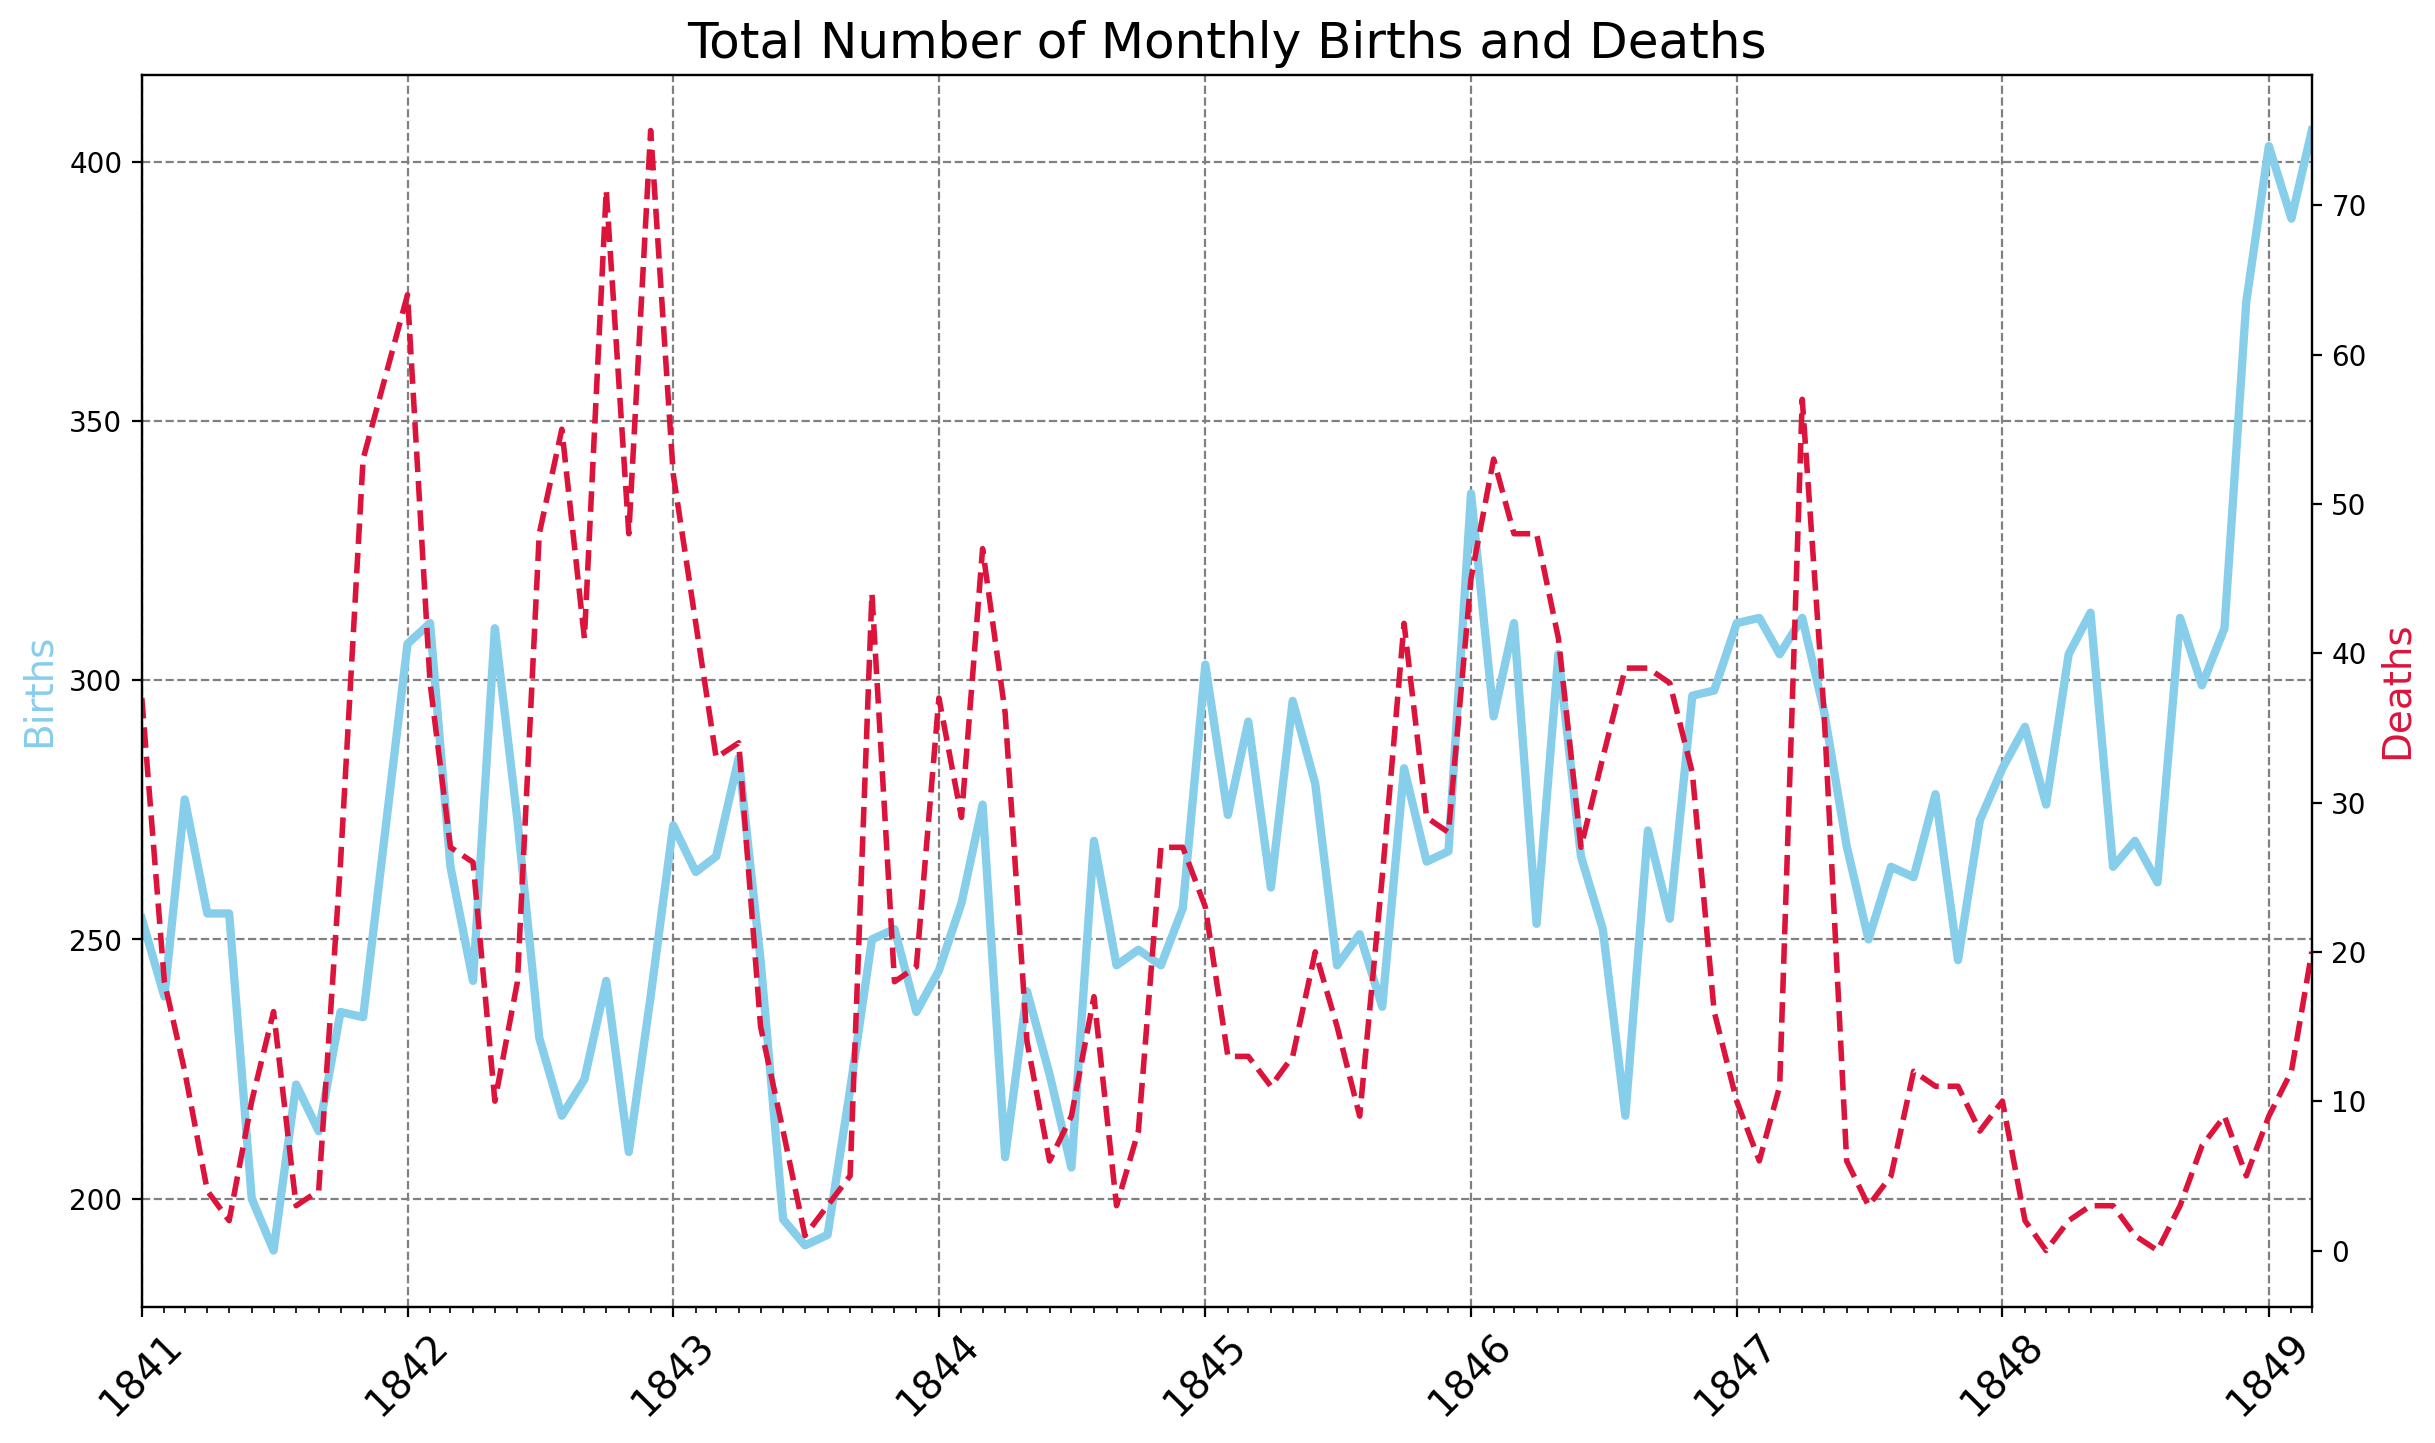

In [17]:
plt.figure(figsize=(14, 8), dpi=200)

plt.title("Total Number of Monthly Births and Deaths", fontsize=18)
plt.xticks(fontsize=14, rotation=45)

# Get the current axes.
ax1 = plt.gca()
ax2= ax1.twinx()

ax1.set_ylabel('Births', fontsize=14, color='skyblue')
ax2.set_ylabel('Deaths', fontsize=14, color='crimson')

# Use locators
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.grid(color='grey', linestyle='--')

ax1.set_xlim(df_monthly.date.min(), df_monthly.date.max())

ax1.plot(df_monthly.date,
         df_monthly.births,
         color='skyblue',
         linewidth=3,
         )

ax2.plot(df_monthly.date,
         df_monthly.deaths,
         color='crimson',
         linewidth=2,
         linestyle='--'
         )

plt.show()

What we see is that something happened after 1847. The total number of deaths seems to have dropped, despite an increasing number of births! 🤔

# The Yearly Data Split by Clinic

Now let's look at the annual data instead.

**Challenge**: Use plotly to create line charts of the births and deaths of the two different clinics at the Vienna General Hospital.
* Which clinic is bigger or more busy judging by the number of births?
* Has the hospital had more patients over time?
* What was the highest number of deaths recorded in clinic 1 and clinic 2?

In [18]:
# Use plotly to create a line chart of the births at two different clinics at the Vienna General Hospital.
yearly_birth_chart = px.line(
    data_frame=df_yearly,
    x='year',
    y='births',
    color='clinic',
    hover_name='clinic',
)

yearly_birth_chart.update_layout(xaxis_title='Year',
                          yaxis_title='Births'
                          )

yearly_birth_chart.show()

We see that more and more women gave birth at the hospital over the years. Clinic 1, which was staffed by male doctors and medical students was also the busier or simply the larger ward. More births took place in clinic 1 than in clinic 2.

In [19]:
# Use plotly to create a line chart of the deaths at two different clinics at the Vienna General Hospital.
yearly_death_chart = px.line(
    data_frame=df_yearly,
    x='year',
    y='deaths',
    color='clinic',
    hover_name='clinic',
)

yearly_death_chart.update_layout(xaxis_title='Year',
                          yaxis_title='Deaths'
                          )

yearly_death_chart.show()

We also see that, not only were more people born in clinic 1, more people also died in clinic 1.

### Calculate the Proportion of Deaths at Each Clinic

**Challenge**: Calculate the proportion of maternal deaths per clinic. That way we can compare like with like.
* Work out the percentage of deaths for each row in the `df_yearly` DataFrame by adding a column called "pct_deaths".
* Calculate the average maternal death rate for clinic 1 and clinic 2 (i.e., the total number of deaths per the total number of births).
* Create another plotly line chart to see how the percentage varies year over year with the two different clinics.
* Which clinic has a higher proportion of deaths?
* What is the highest monthly death rate in clinic 1 compared to clinic 2?

In [21]:
# Work out the percentage of deaths for each row in the df_yearly DataFrame by adding a column called "pct_deaths".
df_yearly['pct_deaths'] = (df_yearly.deaths / df_yearly.births)

df_yearly.head()

,year,births,deaths,clinic,pct_deaths
0,1841,3036,237,clinic 1,0.08
1,1842,3287,518,clinic 1,0.16
2,1843,3060,274,clinic 1,0.09
3,1844,3157,260,clinic 1,0.08
4,1845,3492,241,clinic 1,0.07


In [22]:
# Calculate the average maternal death rate for clinic 1 and clinic 2 (i.e., the total number of deaths per the total number of births).
clinic_1 = df_yearly[df_yearly.clinic == 'clinic 1']
avg_c1 = clinic_1.deaths.sum() / clinic_1.births.sum() * 100
print(f'Average death rate in clinic 1 is {avg_c1:.3}%.')

clinic_2 = df_yearly[df_yearly.clinic == 'clinic 2']
avg_c2 = clinic_2.deaths.sum() / clinic_2.births.sum() * 100
print(f'Average death rate in clinic 2 is {avg_c2:.3}%.')

Average death rate in clinic 1 is 9.92%.
Average death rate in clinic 2 is 3.88%.


Plotting the Proportion of Yearly Deaths by Clinic

In [23]:
# Create another plotly line chart to see how the percentage varies year over year with the two different clinics.
clinic1_death_chart = px.line(
    data_frame=df_yearly,
    x='year',
    y='pct_deaths',
    color='clinic',
    hover_name='clinic',
)

clinic1_death_chart.update_layout(xaxis_title='Year',
                          yaxis_title='Deaths (in percentage)'
                          )

clinic1_death_chart.show()

1842 was a rough year. About 16% of women died in clinic 1 and about 7.6% of women died in clinic 2.

Still, clinic 2 had a consistently lower death rate than clinic 1! This is what puzzled and frustrated Dr Semmelweis.

# The Effect of Handwashing

Dr Semmelweis made handwashing obligatory in the summer of 1947. In fact, he ordered people to wash their hands with clorine (instead of water).

In [24]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

**Challenge**:
* Add a column called "pct_deaths" to `df_monthly` that has the percentage of deaths per birth for each row.
* Create two subsets from the `df_monthly` data: before and after Dr Semmelweis ordered washing hand.
* Calculate the average death rate prior to June 1947.
* Calculate the average death rate after June 1947.

In [25]:
# Add a column called "pct_deaths" to df_monthly that has the percentage of deaths per birth for each row.
df_monthly['pct_deaths'] = df_monthly.deaths / df_monthly.births

df_monthly.head()

,date,births,deaths,pct_deaths
0,1841-01-01,254,37,0.15
1,1841-02-01,239,18,0.08
2,1841-03-01,277,12,0.04
3,1841-04-01,255,4,0.02
4,1841-05-01,255,2,0.01


In [26]:
# Create two subsets from the df_monthly data: before and after Dr Semmelweis ordered washing hand.
df_before_handwash = df_monthly[df_monthly.date < '1847-06-01']
df_after_handwash = df_monthly[df_monthly.date >= '1847-06-01']

In [27]:
avg_before_wash = (df_before_handwash.deaths.sum() / df_before_handwash.births.sum()) * 100
print(f"Average death rate prior to June 1947 is {avg_before_wash:.3}%.")

avg_after_wash = (df_after_handwash.deaths.sum() / df_after_handwash.births.sum()) * 100
print(f"Average death rate after June 1947 is {avg_after_wash:.3}%.")

Average death rate prior to June 1947 is 10.5%.
Average death rate after June 1947 is 2.15%.


### Calculate a Rolling Average of the Death Rate

**Challenge**: Create a DataFrame that has the 6 month rolling average death rate prior to mandatory handwashing.

*Hint*: You'll need to set the dates as the index in order to avoid the date column being dropped during the calculation.

In [28]:
# Create a DataFrame that has the 6 month rolling average death rate prior to mandatory handwashing.
rolling_before_handwash = df_before_handwash.set_index('date').rolling(window=6).mean()

### Highlighting Subsections of a Line Chart

**Challenge**: Copy-paste and then modify the Matplotlib chart from before to plot the monthly death rates (instead of the total number of births and deaths). The chart should look something like this:

<img src=https://i.imgur.com/X6TQe0R.png width=500>

* Add 3 seperate lines to the plot: the death rate before handwashing, after handwashing, and the 6-month moving average before handwashing.
* Show the monthly death rate before handwashing as a thin dashed black line.
* Show the moving average as a thicker, crimon line.
* Show the rate after handwashing as a skyblue line with round markers.
* Look at the [code snippet in the documentation to see how you can add a legend](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html) to the chart.

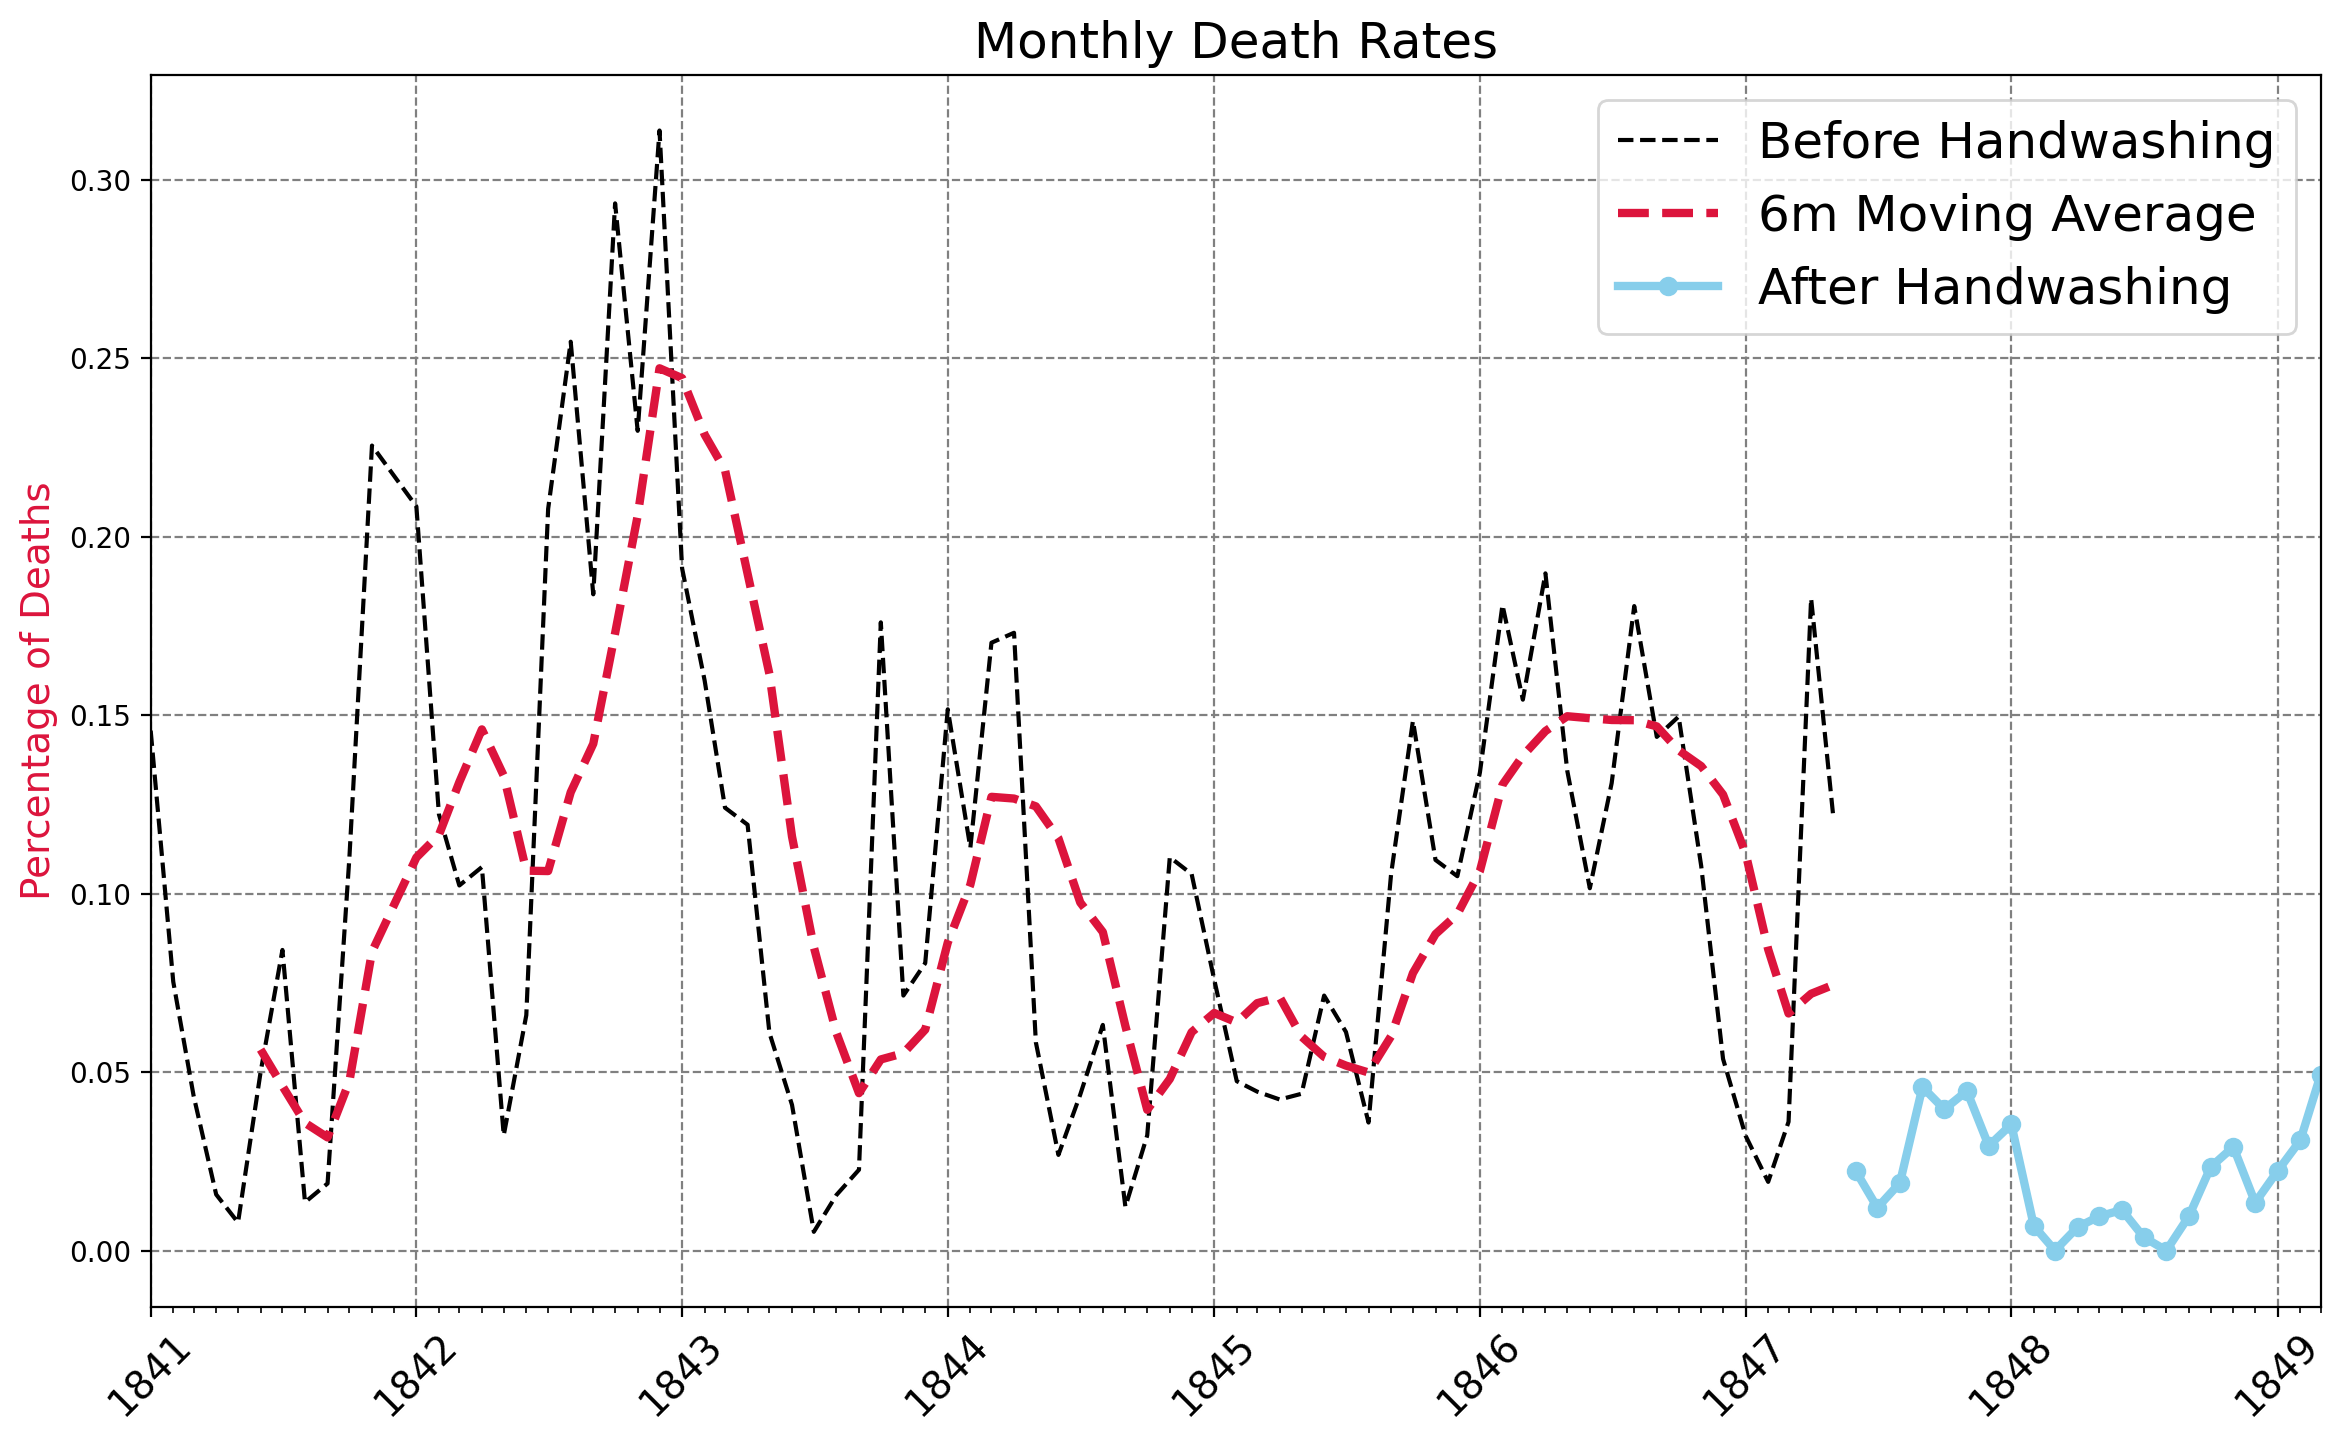

In [29]:
plt.figure(figsize=(14, 8), dpi=200)

plt.title("Monthly Death Rates", fontsize=18)
plt.xticks(fontsize=14, rotation=45)

# Get the current axes.
ax1 = plt.gca()

ax1.set_ylabel('Percentage of Deaths', fontsize=14, color='crimson')

# Use locators
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.grid(color='grey', linestyle='--')

ax1.set_xlim(df_monthly.date.min(), df_monthly.date.max())

bf_hw_line, = ax1.plot(df_before_handwash.date,
                 df_before_handwash.pct_deaths,
                 color='black',
                 linestyle='--',
                 label='Before Handwashing',
         )

mov_bf_line, = ax1.plot(
    rolling_before_handwash.index,
    rolling_before_handwash.pct_deaths,
    color='crimson',
    linewidth=3,
    linestyle='--',
    label='6m Moving Average',
)

af_hw_line, = ax1.plot(df_after_handwash.date,
                 df_after_handwash.pct_deaths,
                 color='skyblue',
                 linewidth=3,
                 marker='o',
                 label='After Handwashing',
         )

plt.legend(handles=[bf_hw_line, mov_bf_line, af_hw_line], fontsize=18)

plt.show()

### Statistics - Calculate the Difference in the Average Monthly Death Rate

**Challenge**:
* What was the average percentage of monthly deaths before handwashing?
* What was the average percentage of monthly deaths after handwashing was made obligatory?
* By how much did handwashing reduce the average chance of dying in childbirth in percentage terms?
* How do these numbers compare to the average for all the 1840s that we calculated earlier?
* How many times lower are the chances of dying after handwashing compared to before?

In [30]:
avg_per_before = df_before_handwash.pct_deaths.mean() *100
print(f"Average percentage of monthly deaths before handwashing: {avg_per_before:.3}%.")

avg_per_after = df_after_handwash.pct_deaths.mean() *100
print(f"Average percentage of monthly deaths after handwashing was made obligatory: {avg_per_after:.3}%.")

reduce_per = avg_per_before - avg_per_after
print(f"Handwashing reduced the monthly proportion of death by {reduce_per:.3}%.")

time_low = avg_per_before / avg_per_after
print(f"Handwashing improved the chances of surviving by {time_low:.2}x.")

Average percentage of monthly deaths before handwashing: 10.5%.
Average percentage of monthly deaths after handwashing was made obligatory: 2.11%.
Handwashing reduced the monthly proportion of death by 8.4%.
Handwashing improved the chances of surviving by 5.0x.


### Use Box Plots to Show How the Death Rate Changed Before and After Handwashing

**Challenge**:
* Use [NumPy's `.where()` function](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to add a column to `df_monthly` that shows if a particular date was before or after the start of handwashing.
* Then use plotly to create box plot of the data before and after handwashing.
* How did key statistics like the mean, max, min, 1st and 3rd quartile changed as a result of the new policy?



In [33]:
# Add a column to df_monthly that shows if a particular date was before or after the start of handwashing.
df_monthly['washing_hands'] = np.where(df_monthly.date < '1847-06-01', 'No', 'Yes')

df_monthly.head()

,date,births,deaths,pct_deaths,washing_hands
0,1841-01-01,254,37,0.15,No
1,1841-02-01,239,18,0.08,No
2,1841-03-01,277,12,0.04,No
3,1841-04-01,255,4,0.02,No
4,1841-05-01,255,2,0.01,No


In [34]:
df_monthly.tail()

,date,births,deaths,pct_deaths,washing_hands
93,1848-11-01,310,9,0.03,Yes
94,1848-12-01,373,5,0.01,Yes
95,1849-01-01,403,9,0.02,Yes
96,1849-02-01,389,12,0.03,Yes
97,1849-03-01,406,20,0.05,Yes


In [41]:
# Use plotly to create box plot of the data before and after handwashing.
handwashing_box = px.box(
    data_frame=df_monthly,
    x='washing_hands',
    y='pct_deaths',
    color='washing_hands',
    title='How Have the Stats Changed with Handwashing?',
)

handwashing_box.update_layout(
    xaxis_title='Washing Hands?',
    yaxis_title='Percentage of Monthly Deaths',
)

handwashing_box.show()

The plot shows us the same data as our Matplotlib chart, but from a different perspective. Here we also see the massive spike in deaths in late 1842. Over 30% of women who gave birth that month died in hospital. What we also see in the box plot is how not only did the average death rate come down, but so did the overall range - we have a lower max and 3rd quartile too. Let's take a look at a histogram to get a better sense of the distribution.

### Use Histograms to Visualise the Monthly Distribution of Outcomes

**Challenge**: Create a [plotly histogram](https://plotly.com/python/histograms/) to show the monthly percentage of deaths.

* Use docs to check out the available parameters. Use the [`color` parameter](https://plotly.github.io/plotly.py-docs/generated/plotly.express.histogram.html) to display two overlapping histograms.
* The time period of handwashing is shorter than not handwashing. Change `histnorm` to `percent` to make the time periods comparable.
* Make the histograms slighlty transparent
* Experiment with the number of bins on the histogram. Which number work well in communicating the range of outcomes?
* Just for fun, display your box plot on the top of the histogram using the `marginal` parameter.

In [63]:
monthly_hist = px.histogram(
    data_frame=df_monthly,
    x='pct_deaths',
    color='washing_hands',
    histnorm='percent',
    opacity=0.6,
    nbins=20,
    barmode='overlay',
    marginal='box',
)

monthly_hist.update_layout(xaxis_title='Proportion of Monthly Deaths',
                           yaxis_title='Count'
                           )

monthly_hist.show()

Now, we have only about 98 data points or so, so our histogram looks a bit jagged. It's not a smooth bell-shaped curve. However, we can estimate what the distribution would look like with a Kernel Density Estimate (KDE).

### Use a Kernel Density Estimate (KDE) to visualise a smooth distribution

**Challenge**: Use [Seaborn's `.kdeplot()`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) to create two kernel density estimates of the `pct_deaths`, one for before handwashing and one for after.

* Use the `shade` parameter to give your two distributions different colours.
* What weakness in the chart do you see when you just use the default parameters?
* Use the `clip` parameter to address the problem.


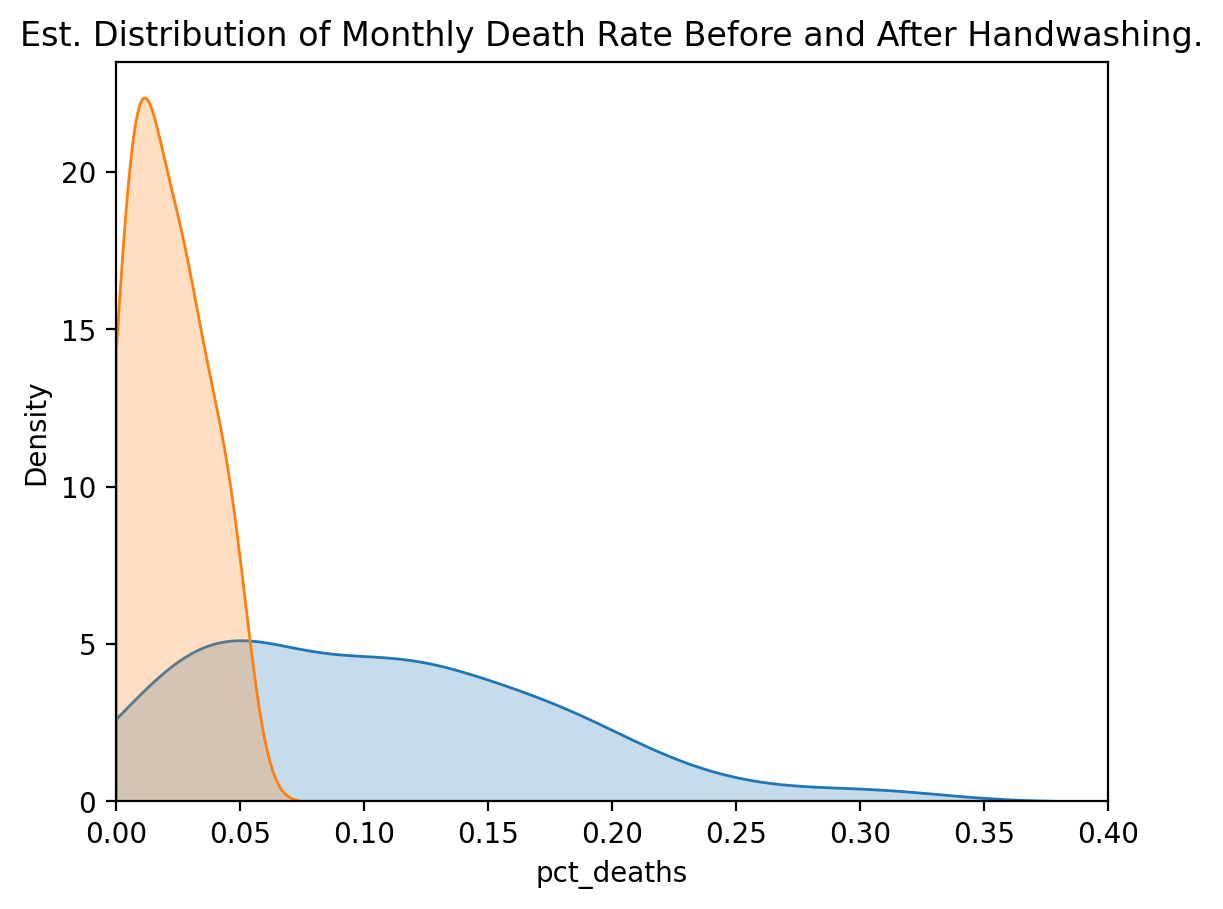

In [80]:
#  Use Seaborn's .kdeplot() to create two kernel density estimates of the pct_deaths, one for before handwashing and one for after.
# shade parameter is depricated.
plt.figure(dpi=200)
sns.kdeplot(df_before_handwash.pct_deaths,
            fill=True,
            clip=(0, 1),
            )
sns.kdeplot(df_after_handwash.pct_deaths,
            fill=True,
            clip=(0, 1),
            )
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing.')
plt.xlim(0, 0.40)
plt.show()

In [ ]:
df

### Use a T-Test to Show Statistical Significance

**Challenge**: Use a t-test to determine if the differences in the means are statistically significant or purely due to chance.

If the p-value is less than 1% then we can be 99% certain that handwashing has made a difference to the average monthly death rate.

* Import `stats` from scipy
* Use the [`.ttest_ind()` function](https://docs.scipy.org/]doc/scipy/reference/generated/scipy.stats.ttest_ind.html) to calculate the t-statistic and the p-value
* Is the difference in the average proportion of monthly deaths statistically significant at the 99% level?



In [88]:
t_stat, p_value = stats.ttest_ind(df_before_handwash.pct_deaths, df_after_handwash.pct_deaths)

print(f'p-palue is {p_value:.10f}')
print(f't-statistic is {t_stat:.4}')

p-palue is 0.0000002985
t-statistic is 5.512


What do you conclude from your analysis, Doctor? 😊

<img src=https://i.imgur.com/rvjNVzQ.gif>

In conclusion, we can conclude that handwashing has made a significant difference to the average monthly death rate. 👍